# Tensorboard demo using handwritten digits classification using neural network

In [24]:
# In this notebook we will classify handwritten digits using a simple neural network which has only input 
# and output layers. We will than add a 
# hidden layer and see how the performance of the model improves

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [26]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:


len(X_train)



60000

In [28]:


X_train[0].shape



(28, 28)

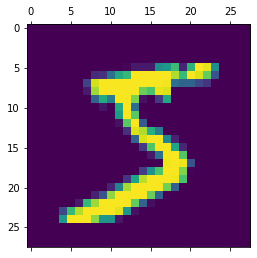

In [29]:


plt.matshow(X_train[0])



In [30]:
plt.show()

In [31]:


y_train[0]



5

In [32]:


X_train = X_train / 255
X_test = X_test / 255



In [35]:


X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)



In [36]:
X_train_flattened.shape

(60000, 784)

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2780 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9843


In [38]:
 %load_ext tensorboard
 %tensorboard --logdir logs/fit



# Either run above inline magic or go to git bash or your command prompt 
# and type below to run it, tensorboard --logdir logs/ This will launch tensorboard
# at this url which you can open in your browser http://localhost:6006/


In [39]:


model.get_weights()



[array([[-0.01301599,  0.07580097,  0.02631935, ..., -0.0050626 ,
          0.02960117, -0.06037991],
        [-0.02001273,  0.02526901, -0.04043752, ..., -0.06077853,
         -0.03285325,  0.03115738],
        [ 0.04341447,  0.02178645, -0.05836292, ..., -0.0756994 ,
         -0.01016054, -0.06282896],
        ...,
        [-0.07120829,  0.03928011, -0.0436819 , ...,  0.03797029,
         -0.0483388 ,  0.0113004 ],
        [ 0.07477464,  0.0510498 ,  0.00586072, ..., -0.02873407,
          0.02967621, -0.01792036],
        [ 0.05803819, -0.01963444, -0.0798545 , ...,  0.07469697,
          0.02201632,  0.00456535]], dtype=float32),
 array([ 7.19045177e-02,  1.36143595e-01,  8.96635000e-03,  1.91576809e-01,
        -8.55795573e-03,  9.99187827e-02, -6.22610152e-02,  1.16823390e-01,
         7.33817890e-02,  3.49267535e-02, -1.23599973e-02, -5.85253723e-02,
         4.67304438e-02, -9.53367501e-02,  1.07451782e-01, -2.27545248e-03,
        -9.13987085e-02,  1.20697245e-02, -7.88471997e